In [2]:
import scipy.io
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Load the MATLAB file
dat = scipy.io.loadmat('/home/mw894/diss/gnm/test-weights/demo_data.mat')

D = dat["demo_data"]["D"][0][0]
A_init = dat["demo_data"]["seed"][0][0]
W_Y = dat["demo_data"]["Wtgt"][0][0]
coord = dat["demo_data"]["coordinates"][0][0]
A_Y =  (W_Y > 0).astype(np.float64)

pos = {i: coord[i,:]  for i in range(0, A_Y.shape[0])}

# The graph to visualize
G = nx.Graph(A_Y)

#norm
W_Y = W_Y / np.max(W_Y)

for i, j in G.edges():
    weight = W_Y[i, j]
    G[i][j]['weight'] = weight

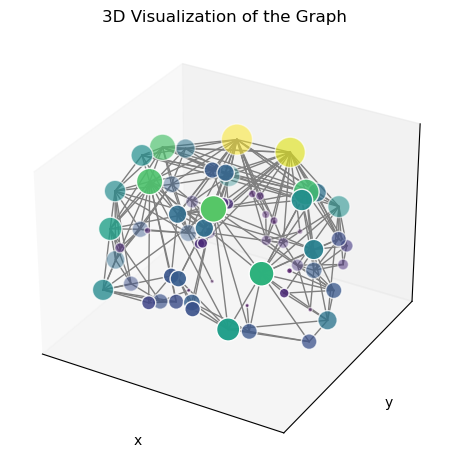

In [6]:
# 3d spring layout
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Calculate the degree of each node
measure = nx.clustering(G, weight='weight')
measure = nx.betweenness_centrality(G, weight='weight')
measure = dict(nx.degree(G, weight='weight'))
max_degree = max(measure.values())
node_sizes = [500 * measure[node] / max_degree for node in G.nodes()]

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=node_sizes, ec="w", c=node_sizes, cmap='viridis')

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray", linewidth=1.0)

ax.set_title("3D Visualization of the Graph")

def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

_format_axes(ax)
fig.tight_layout()
plt.show()

In [18]:
measure

{0: 0.42392074027666116,
 1: 0.24727755997121703,
 2: 1.5686550845512917,
 3: 1.0688240023418818,
 4: 0,
 5: 1.0217449822362434,
 6: 2.300541484546156,
 7: 0.9743071792236404,
 8: 0.4718845015669499,
 9: 1.9216684731658529,
 10: 0.552751262212472,
 11: 0.9710037394465078,
 12: 0.4292542975300111,
 13: 1.4453530491547244,
 14: 0.06228268125727495,
 15: 1.1343869915917921,
 16: 1.196273418192555,
 17: 0.43839457441861773,
 18: 0.6663686731170813,
 19: 0.8337964444177279,
 20: 2.019709923375199,
 21: 0.4713576397939462,
 22: 2.9235753408414467,
 23: 1.4359753584561472,
 24: 0.2585520519402229,
 25: 1.955971398390625,
 26: 4.0783763974828595,
 27: 2.927643191364738,
 28: 1.1184466756935896,
 29: 1.9540452219476538,
 30: 0.06903285440495747,
 31: 0.06282676001886896,
 32: 0.16389246725783105,
 33: 1.1900834059041443,
 34: 0.3988516431382438,
 35: 0.3076804285981781,
 36: 1.510558229290493,
 37: 1.1637607316572303,
 38: 0,
 39: 1.0860748753214327,
 40: 2.6130332249201946,
 41: 1.017633633159